In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../input/bank-note-authentication-uci-data/BankNote_Authentication.csv")

In [3]:
train

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
x = train.drop(["class"],axis=1)
y = train['class']

In [5]:
y.value_counts()

0    762
1    610
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [7]:
# splitting the dataset into train and test dataset with 4:1 ratio (80%-20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 26,stratify=y)

## Training on different algorithms

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [9]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

In [10]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')


Logistic Regression


Confusion Matrix
[[149   4]
 [  2 120]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.97      0.98      0.98       122

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

----------------------------------------------------------------------------------------------------
Accuracy =  97.81818182 %


**We have a accuracy of 99.90%**

### LINEAR SUPPORT VECTOR CLASSIFIER

In [11]:
%%time
from sklearn.svm import SVC
# Instantiate the model
svc = SVC()
# Fit the model on training data
svc.fit(x_train, y_train)

CPU times: user 5.12 ms, sys: 1.02 ms, total: 6.14 ms
Wall time: 6.17 ms


SVC()

In [12]:
# Getting the predictions for x_test
y_pred_svc = svc.predict(x_test)

In [13]:
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*50)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*50)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,8)
print('Accuracy = ', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[153   0]
 [  0 122]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


### K-NEAREST NEIGHBORS

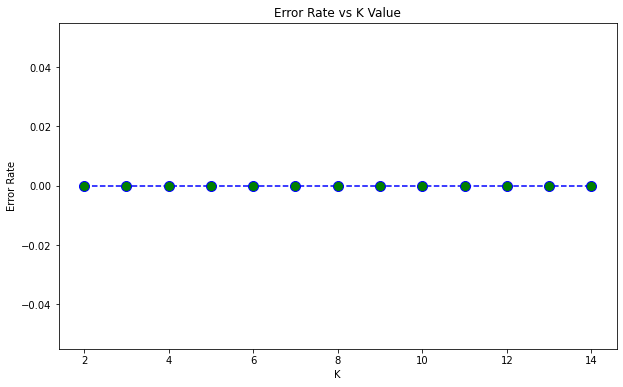

CPU times: user 503 ms, sys: 149 ms, total: 652 ms
Wall time: 468 ms


In [14]:
%%time
from sklearn.neighbors import KNeighborsClassifier

# in knn we need to select a value of nearest neighbour, for now lets use a for loop. If accuarcy
# is better than other models then we would search for optimal parameter

error_rate = []

for i in range (2,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(2,15), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [15]:
# now using above data to train with n_neighbors having least error rate

n_value = 0
min_error = float('inf')
for idx,error in enumerate(error_rate):
    if min_error>error:
        min_error=error
        n_value=idx+2

knn = KNeighborsClassifier(n_neighbors = n_value)
# Fit new KNN on training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [16]:
# Predict KNN
y_pred_knn_op = knn.predict(x_test)

In [17]:
print('K-Nearest Neighbors(KNN)')
print('k =',n_value)

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*50)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*50)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,8)
print('Accuracy = ',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 2


[[153   0]
 [  0 122]]
----------------------------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


### RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 250,n_jobs=-1)
# Fit model to training data
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [19]:
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*50)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,8)
print('Accuracy = ', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[151   2]
 [  0 122]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

----------------------------------------------------------------------------------------------------
Accuracy =  99.27272727 %


### XGBoost Classifier

In [20]:
from xgboost import XGBClassifier

# Create model object
xgb = XGBClassifier(n_jobs=-1)

# Fit model to training data
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
print('XGBoost Classifer')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_xgb))

# Accuracy
print('--'*50)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb)*100,8)
print('Accuracy = ', xgb_accuracy,'%')

XGBoost Classifer


Confusion Matrix
[[152   1]
 [  0 122]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  99.63636364 %


In [22]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC', 
               'K-Nearest Neighbors', 'Random Forest','XGBoost Classifier'],
    'Score': [logreg_accuracy, svc_accuracy, 
               knn_op_accuracy, rf_accuracy,xgb_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Linear SVC,100.000000
2,K-Nearest Neighbors,100.000000
4,XGBoost Classifier,99.636364
3,Random Forest,99.272727
0,Logistic Regression,97.818182
